In [ ]:
# import libraries 
import pandas as pd

from utilsforecast.plotting import plot_series

In [ ]:
# Read csv
df = pd.read_csv('coffee_time_series_data.csv')

In [ ]:
# Change date column to date type
df['day'] = pd.to_datetime(df['day'], utc=True)

In [ ]:
# Show df
df

,day,store_location,coffee_sales,tea_sales,chocolate_product_sales,merchandise_sales,bakery_sales,syrup_sales
0,2023-01-01 00:00:00+00:00,Astoria,82,66,25,0,17,0
1,2023-01-01 00:00:00+00:00,Hell's Kitchen,87,66,13,0,18,0
2,2023-01-01 00:00:00+00:00,Lower Manhattan,72,59,12,0,33,0
3,2023-01-02 00:00:00+00:00,Astoria,93,67,16,0,36,0
4,2023-01-02 00:00:00+00:00,Hell's Kitchen,91,70,11,0,23,0
...,...,...,...,...,...,...,...,...
538,2023-06-28 23:00:00+00:00,Hell's Kitchen,142,95,19,0,38,0
539,2023-06-28 23:00:00+00:00,Lower Manhattan,122,92,20,0,71,0
540,2023-06-29 23:00:00+00:00,Astoria,176,124,27,2,54,21
541,2023-06-29 23:00:00+00:00,Hell's Kitchen,131,96,26,0,65,25


In [ ]:
# melt df from wide to long format
df_melt=pd.melt(
                frame=df,
                id_vars=['day', 'store_location'],
                value_vars=['coffee_sales',	"tea_sales",
                            'chocolate_product_sales',	'merchandise_sales',
                            'bakery_sales',	'syrup_sales'],
                var_name='product_type',
                value_name='sales_num'
                )

In [ ]:
# Rename date column 
df_melt.rename(columns={'day': 'date'}, inplace=True)

In [ ]:
# View melted df
df_melt

,date,store_location,product_type,sales_num
0,2023-01-01 00:00:00+00:00,Astoria,coffee_sales,82
1,2023-01-01 00:00:00+00:00,Hell's Kitchen,coffee_sales,87
2,2023-01-01 00:00:00+00:00,Lower Manhattan,coffee_sales,72
3,2023-01-02 00:00:00+00:00,Astoria,coffee_sales,93
4,2023-01-02 00:00:00+00:00,Hell's Kitchen,coffee_sales,91
...,...,...,...,...
3253,2023-06-28 23:00:00+00:00,Hell's Kitchen,syrup_sales,0
3254,2023-06-28 23:00:00+00:00,Lower Manhattan,syrup_sales,0
3255,2023-06-29 23:00:00+00:00,Astoria,syrup_sales,21
3256,2023-06-29 23:00:00+00:00,Hell's Kitchen,syrup_sales,25


In [ ]:
# Create individual dfs for each store id
df_astoria = df_melt[df_melt['store_location']=='Astoria']
df_hells_kitchen = df_melt[df_melt['store_location']=="Hell's Kitchen"]
df_lw_manhattan = df_melt[df_melt['store_location']=='Lower Manhattan']

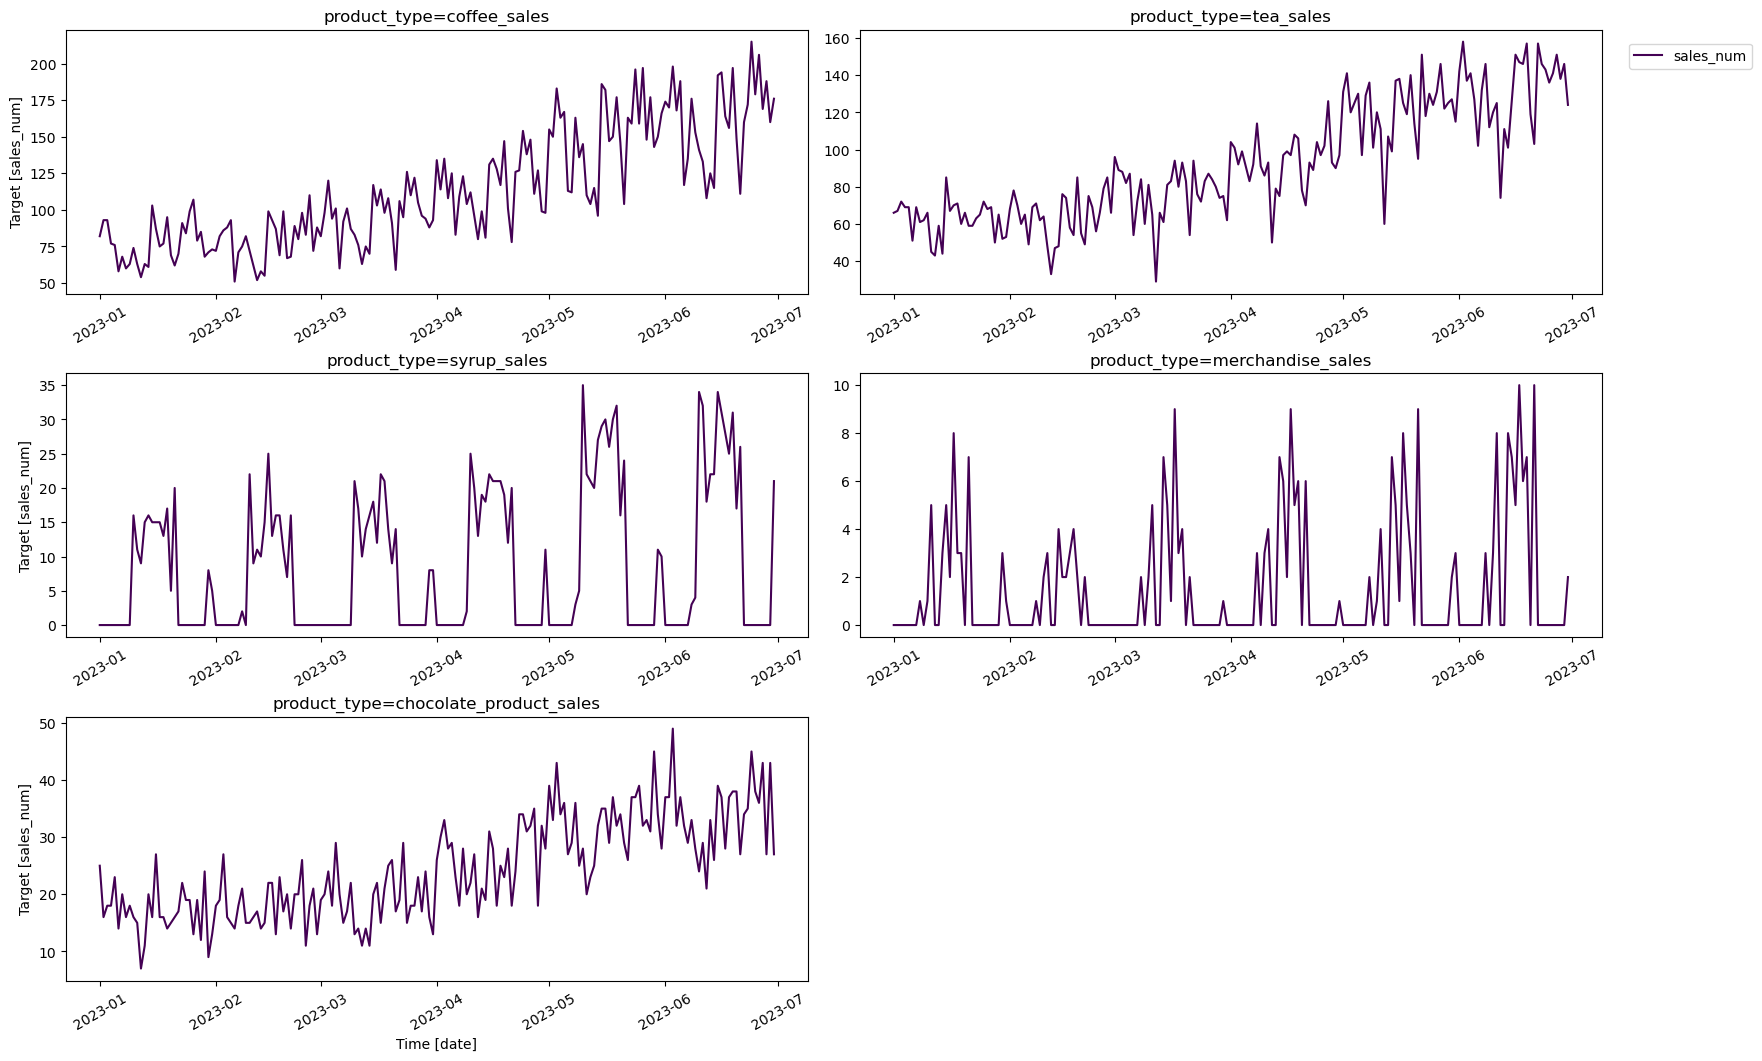

In [ ]:
# Plot product types over time -- ASTORIA
plot_series(
    df=df_astoria,
    ids=['coffee_sales', 'tea_sales', 'syrup_sales', 'merchandise_sales', 'chocolate_product_sales'],
    time_col='date',
    id_col='product_type',
    target_col='sales_num',
    palette='viridis'
)

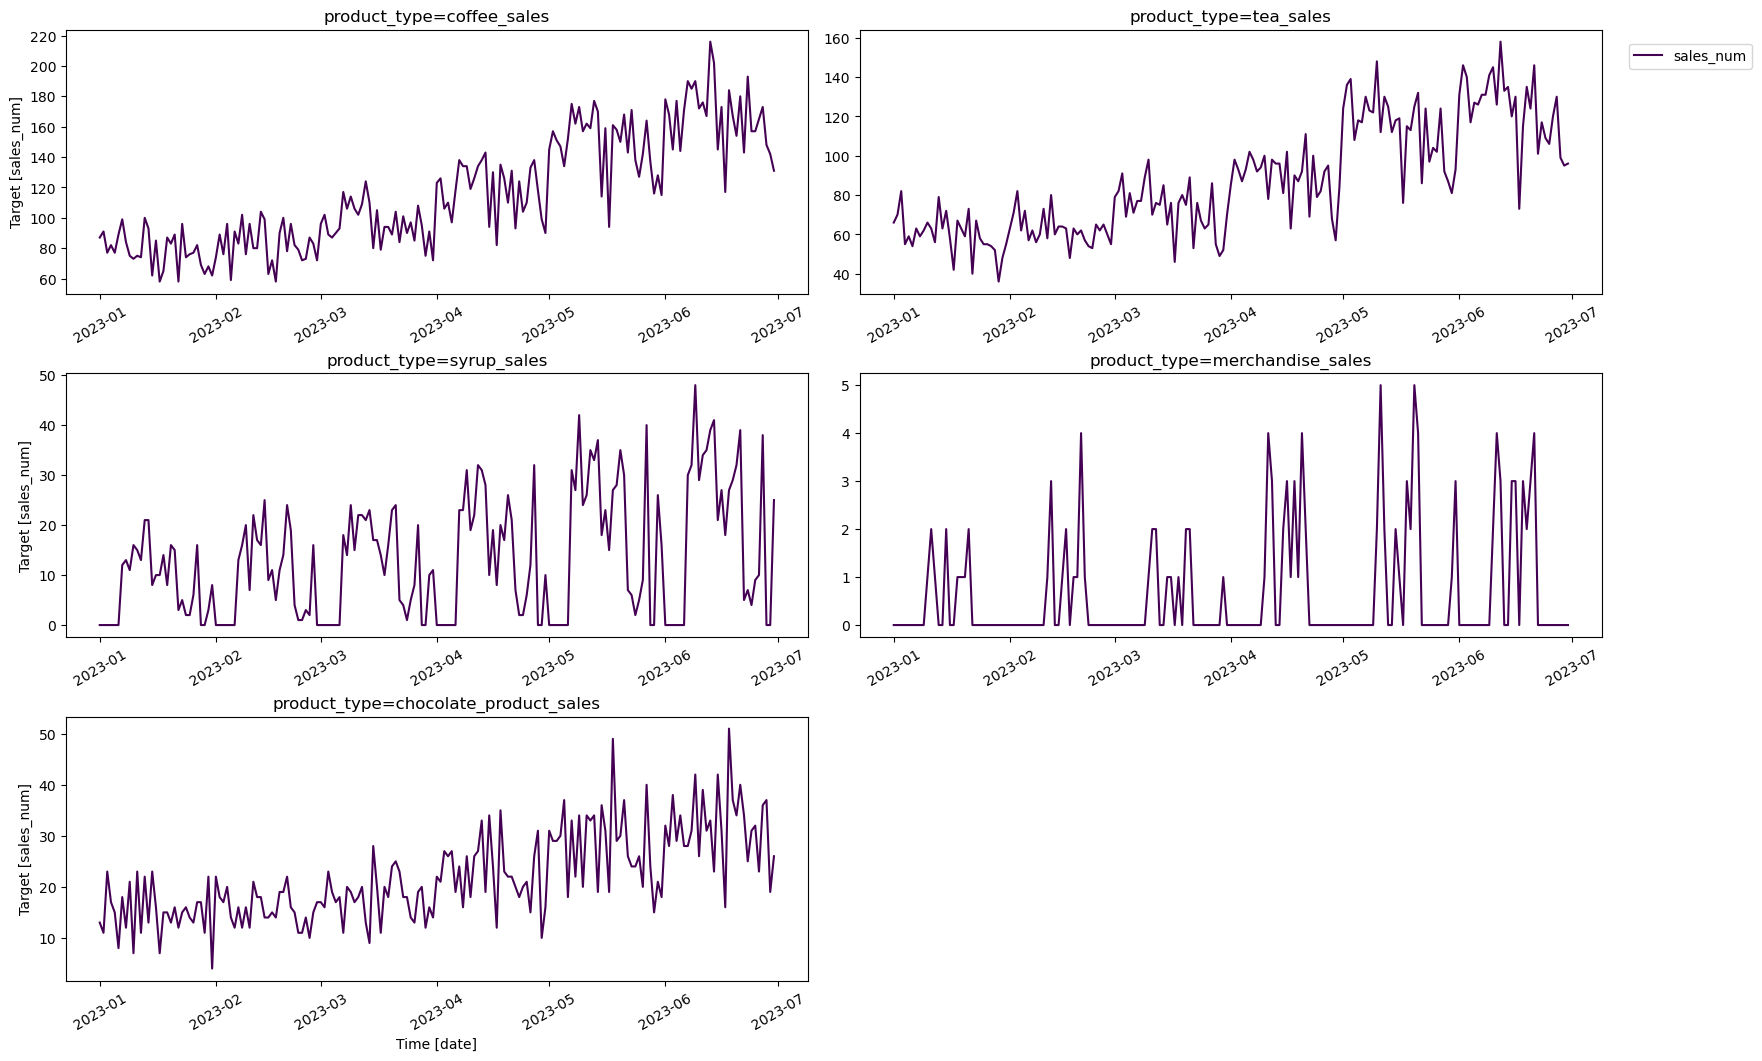

In [ ]:
# Plot product types over time -- HELL'S KITCHEN
plot_series(
    df=df_hells_kitchen,
    ids=['coffee_sales', 'tea_sales', 'syrup_sales', 'merchandise_sales', 'chocolate_product_sales'],
    time_col='date',
    id_col='product_type',
    target_col='sales_num',
    palette='viridis'
)

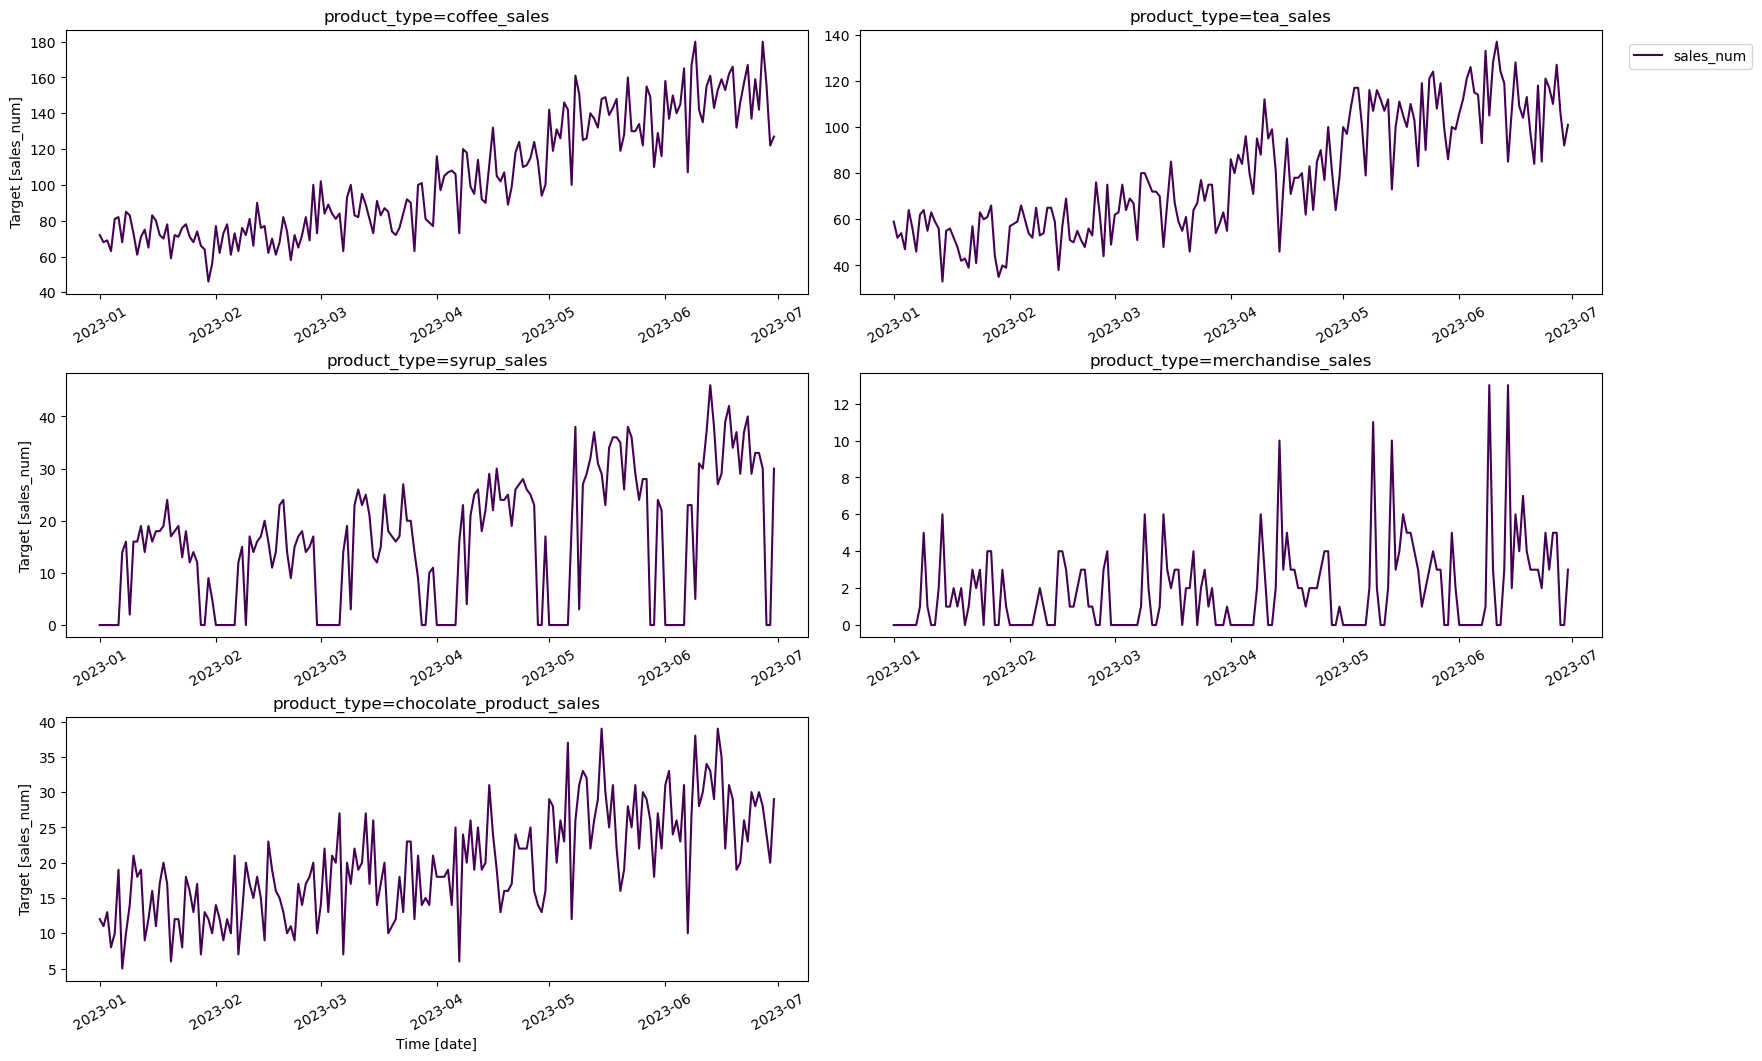

In [ ]:
# Plot product types over time -- LOWER MANHATTAN
plot_series(
    df=df_lw_manhattan,
    ids=['coffee_sales', 'tea_sales', 'syrup_sales', 'merchandise_sales', 'chocolate_product_sales'],
    time_col='date',
    id_col='product_type',
    target_col='sales_num',
    palette='viridis'
)

In [ ]:
# Add in fictitious long and lag coords for Tableau map 
df_astoria['latitude'] = '40.7721'
df_astoria['longitude'] = '-73.9301'
df_hells_kitchen['latitude'] = '40.7638'
df_hells_kitchen['longitude'] = '-73.9918'
df_lw_manhattan['latitude'] = '40.7074'
df_lw_manhattan['longitude'] = '-74.0113'

/var/folders/vy/kdp_qm9n34jdpdmqk1dtnc100000gn/T/ipykernel_48589/3499154532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_astoria['latitude'] = '40.7721'
/var/folders/vy/kdp_qm9n34jdpdmqk1dtnc100000gn/T/ipykernel_48589/3499154532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_astoria['longitude'] = '-73.9301'
/var/folders/vy/kdp_qm9n34jdpdmqk1dtnc100000gn/T/ipykernel_48589/3499154532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [ ]:
# Concat separate dfs 
df_concat = pd.concat([df_lw_manhattan, df_astoria, df_hells_kitchen])

In [ ]:
# View concat data 
df_concat

,date,store_location,product_type,sales_num,latitude,longitude
2,2023-01-01 00:00:00+00:00,Lower Manhattan,coffee_sales,72,40.7074,-74.0113
5,2023-01-02 00:00:00+00:00,Lower Manhattan,coffee_sales,68,40.7074,-74.0113
8,2023-01-03 00:00:00+00:00,Lower Manhattan,coffee_sales,69,40.7074,-74.0113
11,2023-01-04 00:00:00+00:00,Lower Manhattan,coffee_sales,63,40.7074,-74.0113
14,2023-01-05 00:00:00+00:00,Lower Manhattan,coffee_sales,81,40.7074,-74.0113
...,...,...,...,...,...,...
3244,2023-06-25 23:00:00+00:00,Hell's Kitchen,syrup_sales,10,40.7638,-73.9918
3247,2023-06-26 23:00:00+00:00,Hell's Kitchen,syrup_sales,38,40.7638,-73.9918
3250,2023-06-27 23:00:00+00:00,Hell's Kitchen,syrup_sales,0,40.7638,-73.9918
3253,2023-06-28 23:00:00+00:00,Hell's Kitchen,syrup_sales,0,40.7638,-73.9918


In [ ]:
# Save concat data to csv
df_concat.to_csv('coffee_sales.csv')